In [32]:
from xgboost import XGBRegressor # 회귀트리 모델
from xgboost import plot_importance # 중요변수 시각화

from sklearn.datasets import load_boston # dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. data loading

In [33]:
boston = load_boston()
X = boston.data
y = boston.target
col_names = boston.feature_names

In [34]:
X.shape, col_names, y.shape, y

((506, 13),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 (506,),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
        19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
        20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
        23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
        33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
        21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
        20.3, 20.5, 17.3, 18.8, 21.4,

# 2. train/test split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [36]:
print(x_train.shape)
print(x_test.shape)

(354, 13)
(152, 13)


# 3. model

In [37]:
model = XGBRegressor()
model.fit(x_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# 4. 중요변수 시각화

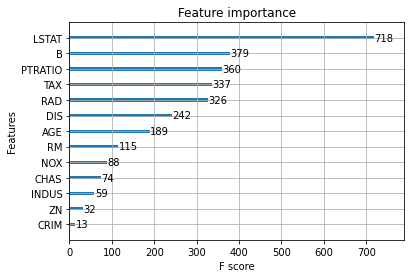

In [38]:
import matplotlib.pyplot as pyplot
plot_importance(model)
plt.yticks(range(13),col_names)
plt.show()

# 5. model 평가

In [39]:
y_pred = model.predict(x_test)
y_true = y_test

In [40]:
mae = mean_absolute_error(y_true, y_pred)
mae

2.2205397279638994

In [41]:
mse = mean_squared_error(y_true, y_pred)
mse

9.068360174886596